In [4]:
import numpy as np
from numpy import zeros, sqrt, pi,exp,loadtxt, dot, arctan2, cross

import matplotlib 
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from matplotlib.colors import DivergingNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

import seaborn as sns

import pandas as pd


fsl = 50
font = {'weight' : 'medium',
        'size'   : 46}
matplotlib.rc('font', **font)
sns.set_context("poster")

In [5]:
df = pd.read_csv("summary.csv")
df = df[df.convolutionwidth >=2 ]

df.describe()

,nx,quadraturetype,quadratureorder,convolutionmagnitude,convolutionwidth,rotationmagnitude,testcaseid,absL1,relL1,absL2,relL2
count,306.0,306.0,306.0,306.000000,306.000000,306.0,306.0,306.000000,306.000000,306.000000,306.000000
mean,70.0,3.0,5.0,7.611111,8.500000,0.0,2.0,44.310488,0.106446,21.945876,0.074406
std,0.0,0.0,0.0,6.087133,5.510348,0.0,0.0,36.107823,0.086741,20.086919,0.068103
min,70.0,3.0,5.0,0.000000,2.000000,0.0,2.0,7.143812,0.017161,4.215550,0.014292
25%,70.0,3.0,5.0,2.000000,4.000000,0.0,2.0,8.457443,0.020317,4.811789,0.016314
50%,70.0,3.0,5.0,6.500000,7.000000,0.0,2.0,31.701864,0.076157,13.283373,0.045036
75%,70.0,3.0,5.0,12.000000,12.000000,0.0,2.0,74.023295,0.177825,35.564849,0.120580
max,70.0,3.0,5.0,20.000000,20.000000,0.0,2.0,123.975056,0.297823,84.065155,0.285016


0.876087854944639
17.470666176173406
1.0


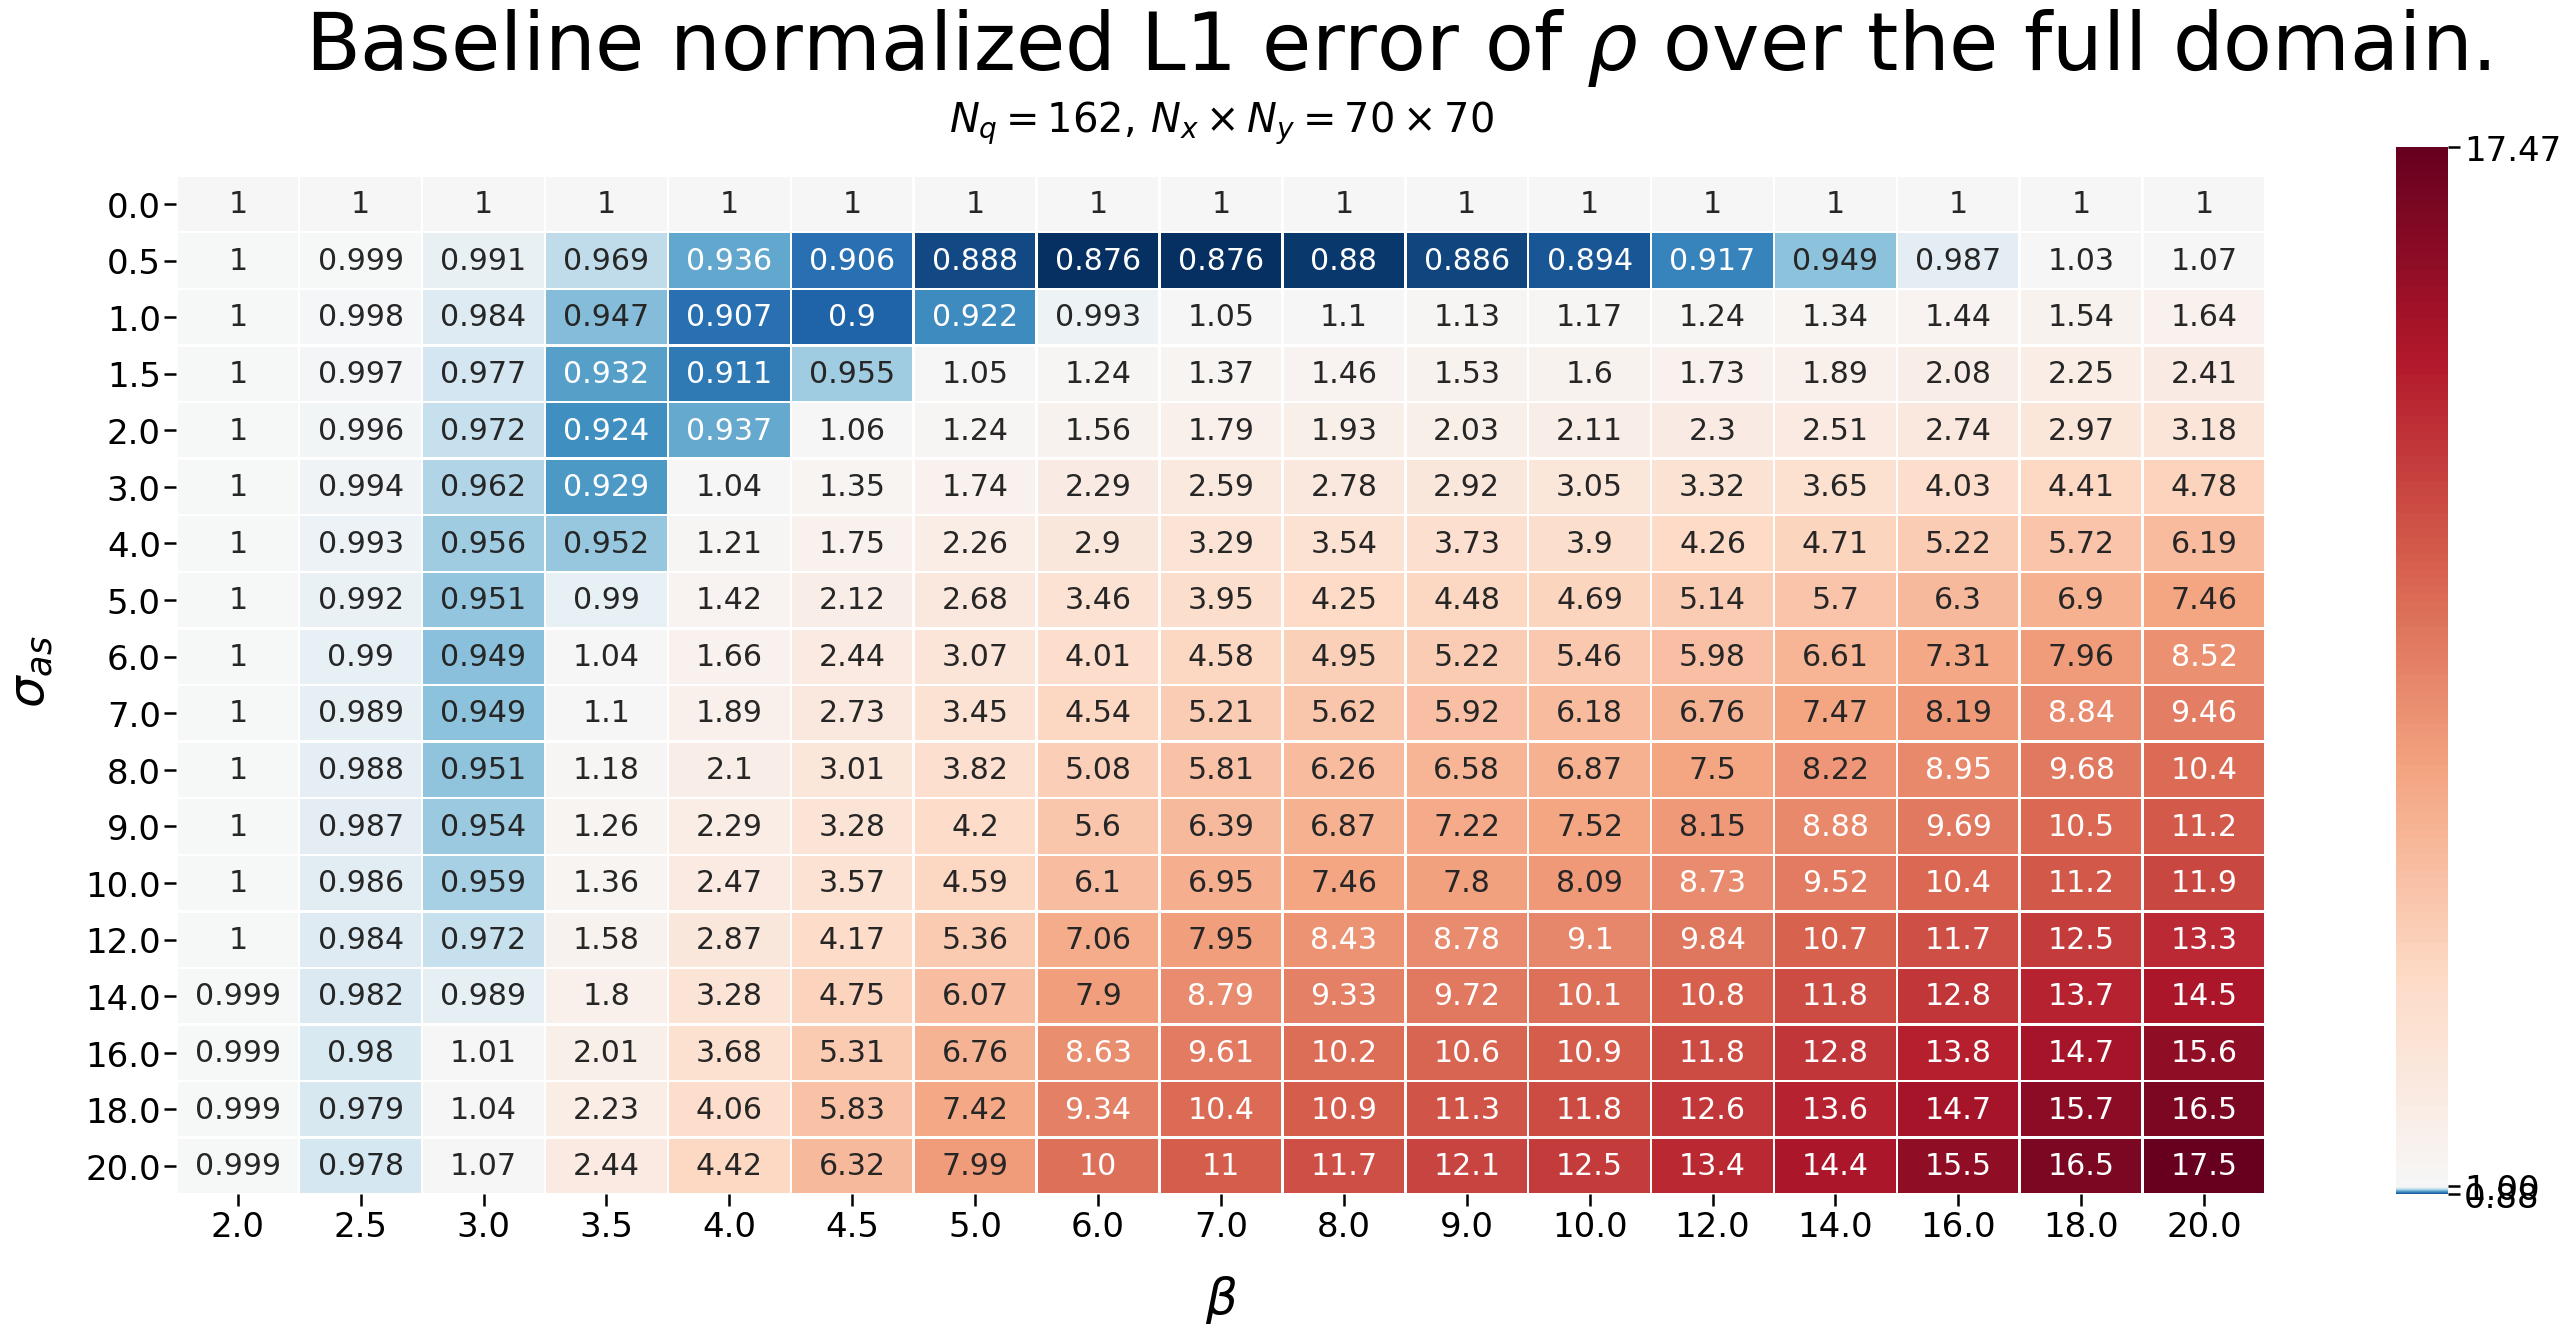

In [6]:
normalized = True
nq = [162]
r = [0.2,0.6,0.9]
fsl = 40
df["convolutionwidthcorrect"] = np.round(df["convolutionwidth"] ,3)
for nattr,attr in enumerate(["absL2"]):

    for inx,nx,i,order in zip([0],[70],[0],[5]):
            fig,ax = plt.subplots(1,1,figsize=(40,20))
            matplotlib.rc('font', **font)
    
    #for inx,nx in enumerate([50,100,200]):
    #    for i,order in enumerate([2,3,4]):
    #        ax = axs[inx,i]
            
            dftmp = df[df["quadratureorder"]==order]
            dftmp = dftmp[dftmp["nx"]==nx] 
            piv = dftmp.pivot(index="convolutionmagnitude",columns="convolutionwidthcorrect",values=attr)
            if normalized: # divide all errors by the base line error, i.e. no AS
                piv = piv.div(piv.values[0,:])
            #piv = np.log10(piv)
            cmap = sns.color_palette("RdBu_r", 20001)
            vmin = piv.values.min()
            vmax = piv.values.max()
            vcenter = np.min(piv.values[0,:])
            if vmax == vcenter: # we don't need a diverging colormap because all values are smaller than baseline
                vcenter = (vmax+vmin)/2
                cmap = "Blues_r"
            if vmin==vcenter:
                vcenter= (vmax+vmin)/2
                cmap = "Reds"
            print(vmin)
            print(vmax)
            print(vcenter)
            divnorm = DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
            sns.heatmap(piv,annot=True,  linewidths=1.5, ax=ax, fmt=".3g",cmap=cmap,norm=divnorm,
                    cbar_kws={"ticks":[vmin,vcenter,vmax]},annot_kws={"fontsize":30})
            
            # set axis style
            ax.set_title(r"$N_q={},\, N_x \times N_y={}\times{}$".format(nq[i],nx,nx),fontdict={'fontsize': fsl, 'fontweight': 'medium'},pad = 10)
            ax.set_ylim(18, -0.5)
            ax.set_xlabel(r"$\beta$", fontdict={'fontsize': 50, 'fontweight': 'medium'},labelpad = 30)
            ax.set_ylabel(r"$\sigma_{as}$",fontdict={'fontsize': 50, 'fontweight': 'medium'},labelpad = 30)
            
            plt.xticks(fontsize=34)
            plt.yticks(fontsize=34,rotation=0)
            cax = plt.gcf().axes[-1]
            cax.tick_params(labelsize=34)
            # find the best element and circle it in yellow 
            pivu = piv.unstack()
            minwidth,minstr = pivu.idxmin()
            for posj,j in enumerate(np.array([100,200,300,400,500,600,700,800,900,1000])/252):
                for posk,k in enumerate([0,1,2,5,10,20,30,40,50,60,70,80,90,100]):
                    if minwidth==j and minstr == k:
                        #print("{},{},{},{}".format(posj,j,posk,k))
                        ax.add_patch(Rectangle((posj,posk), 1, 1, fill=False, edgecolor='xkcd:yellow', lw=10))
            firstword = "Baseline normalized" if normalized else "Absolute"
            if nattr==0:
                plt.suptitle(r"{} L1 error of $\rho$ over the full domain.".format(firstword),fontsize=2*fsl )
            else:
                plt.suptitle(r"{} L1 error of $\rho$ along circle of radius $r={}$".format(firstword,r[nattr-1]),fontsize=2*fsl)
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            if normalized:
                plt.savefig("{}_{}_ictt_heatmap_{}_normalized.png".format(nx,order,attr))
            else:
                plt.savefig("{}_{}_ictt_heatmap_{}.png".format(nx,order,attr))